In [4]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Bring in raw data

In [5]:
qPCRdt = pd.read_csv('./data/GEP_qPCR_results_merged.csv')
qPCRdt.loc[:,'SampleIndex'] = [qPCRdt.Name[x] + " " + str(qPCRdt.SampleDate[x]) for x in qPCRdt.index]
PP16NonSD = dt.date(2014,1,28)
PP16NonSD = pd.to_datetime(PP16NonSD)
PP16VernSD = dt.date(2014,5,6) - dt.timedelta(5) ##Planted on 5th of Mar but subtract 10 days to account for thermal time during vernalisation
PP16VernSD = pd.to_datetime(PP16VernSD)
PP8NonSD = dt.date(2014,7,22)
PP8NonSD = pd.to_datetime(PP8NonSD)
PP8VernSD = dt.date(2014,9,15) - dt.timedelta(5) ##Planted on 15th of Sep but subtract 10 days to account for thermal time during vernalisation
PP8VernSD = pd.to_datetime(PP8VernSD)
MeanTemp = 21 
BaseHSTT = [0,2.5,7,14,18]
BaseTT = [110,335,884,2500,3430]

PhenoStages = pd.read_csv('../ProcessedData/PhenoStages.csv')

## Calculate some more phenology variables

In [6]:
PhenoStages.loc[:,'FLTT'] = [np.interp(PhenoStages.loc[x,'FLN'],BaseHSTT,BaseTT)for x in PhenoStages.index]
PhenoStages.loc[:,'TSTT'] = [np.interp(PhenoStages.loc[x,'HSTS'],BaseHSTT,BaseTT)for x in PhenoStages.index]
PhenoStages.loc[:,'FITT'] = [np.interp(PhenoStages.loc[x,'HSFI'],BaseHSTT,BaseTT)for x in PhenoStages.index]
PhenoStages.set_index(['PhotoP','Vern','Cult'],inplace=True)

## Make a dataframe with reference reads in it

In [7]:
RefReads = qPCRdt.loc[(qPCRdt.Name=='IRC')|(qPCRdt.Name=='NTC')]

## Remove Reference reads from main data frame

In [8]:
qPCRdt.drop(RefReads.index,inplace=True)

## Remove Outlier measurement sets

In [9]:
#List samples that are apparant outliers (itentified from graphs further down)
Excludes = qPCRdt[(qPCRdt.SampleIndex == 'CRWT195 2014-04-23')|
                 (qPCRdt.SampleIndex == 'AMK237 2014-06-10')|
                 (qPCRdt.SampleIndex == 'SCN322 2014-06-10')|
                 (qPCRdt.SampleIndex == 'AMK153 2014-04-23')|
                 (qPCRdt.SampleIndex == 'CRWT37 2014-02-25')]
qPCRdt.drop(Excludes.index,inplace=True)

## Make some lists of things

In [10]:
Samples = qPCRdt.SampleIndex.drop_duplicates().dropna()
Genes = qPCRdt.gene.drop_duplicates().dropna()
Pps = qPCRdt.Pp.drop_duplicates().dropna()
Verns = qPCRdt.Vern.drop_duplicates().dropna()
Cults = ['Otane',
         'BattenSpring',
         'Saracen',
         'Amarok',
         'BattenWinter',
         'CRWT153'] #Specify cultivar list manually to set in maturity order

## Make a dataframe with the mean Cp values for each gene in each sample

In [11]:
HouseKeepers = pd.DataFrame(columns = Genes)
for Samp in Samples:
    Cps = []
    for Gene in Genes:
        Cps.append(qPCRdt.loc[qPCRdt.SampleIndex==Samp].loc[qPCRdt.gene == Gene,'Cp'].mean())
    HouseKeepers.loc[Samp,:]=Cps

## Check corelation of genes

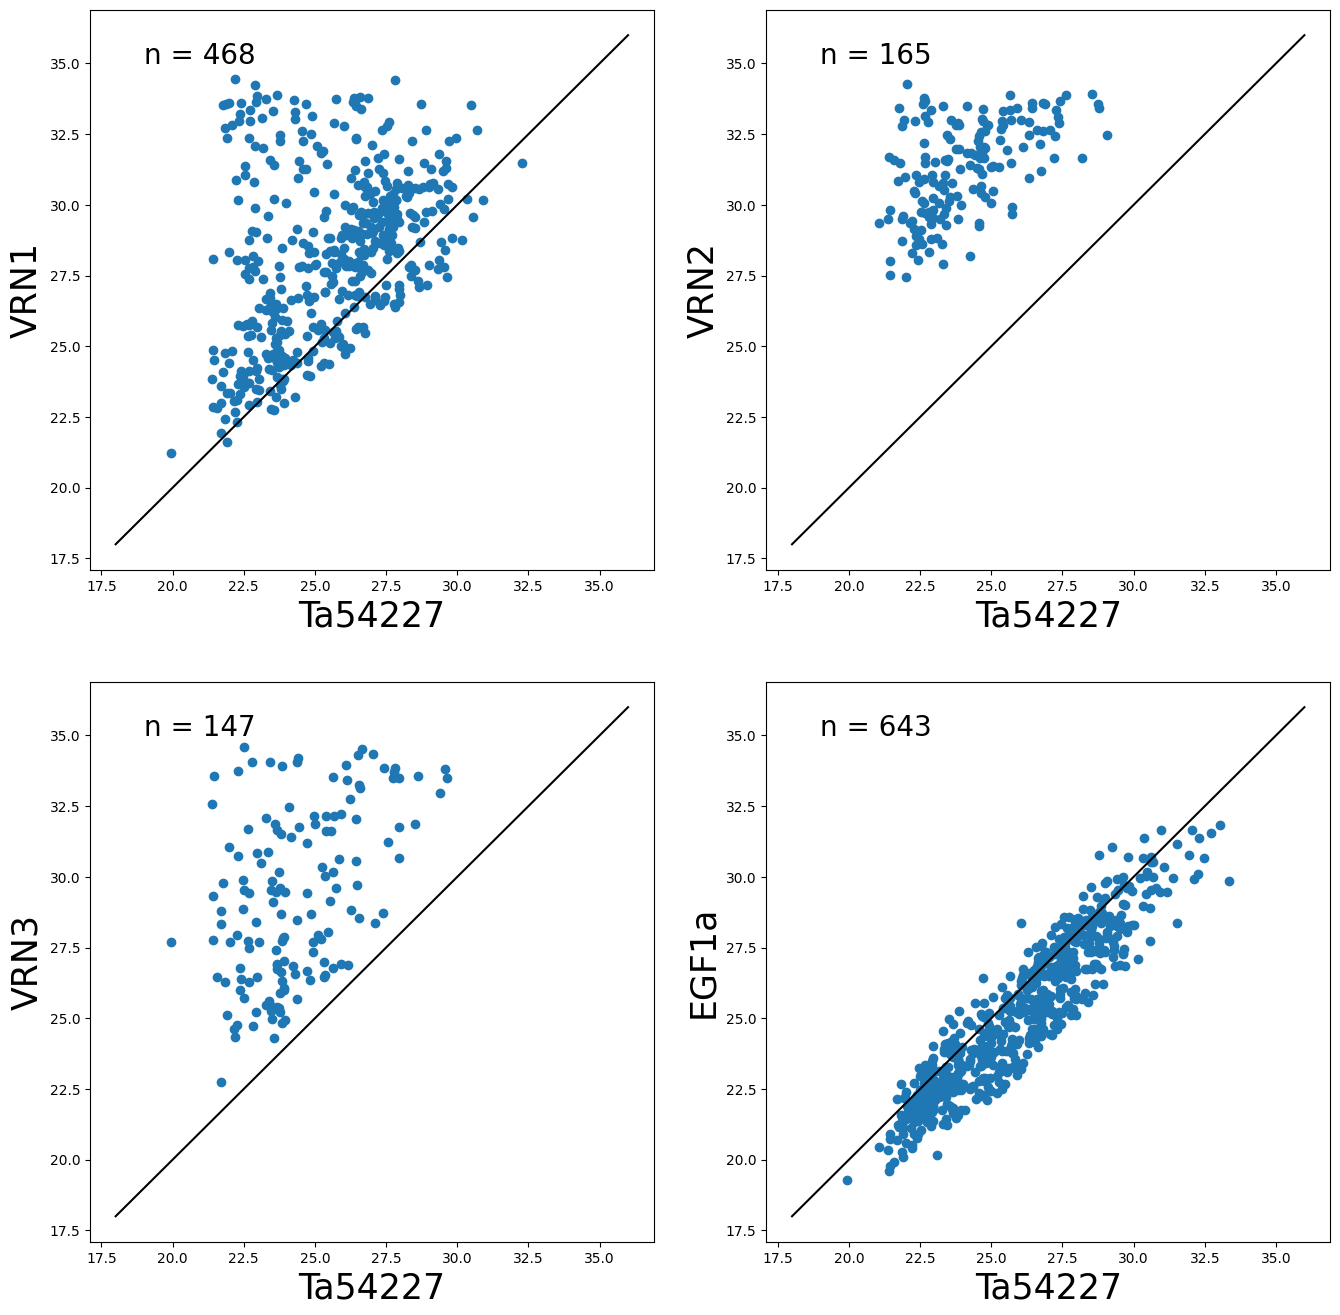

In [12]:
Fig = plt.figure(figsize=(16,16))
pos = 1
for Gene in Genes[:-1]:
    ax = Fig.add_subplot(2,2,pos)
    plt.plot(HouseKeepers.Ta54227,HouseKeepers.loc[:,Gene],'o')
    plt.ylabel(Gene,fontsize=25)
    plt.xlabel('Ta54227',fontsize=25)
    plt.plot([18,36],[18,36],'-',color='k')
    count = str(HouseKeepers.loc[:,Gene].dropna().size)
    plt.text(19,35,'n = ' + count, fontsize = 20)
    pos+=1
    

## Check plate references

In [13]:
#Make a data frame with the mean Cp values for each gene in each plate
RefCps = RefReads.groupby(['gene','Plate']).mean('numeric_only').loc[:,'Cp'].to_frame()

C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_8768\2047403315.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax = Fig.add_subplot(1,5,pos, xticklabels=['GEP1','GEP2', 'GEP5', 'GEP6', 'GEP7', 'GEP8','GEP9'])
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_8768\2047403315.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax = Fig.add_subplot(1,5,pos, xticklabels=['GEP1','GEP2', 'GEP5', 'GEP6', 'GEP7', 'GEP8','GEP9'])
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_8768\2047403315.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax = Fig.add_subplot(1,5,pos, xticklabels=['GEP1','GEP2', 'GEP5', 'GEP6', 'GEP7', 'GEP8','GEP9'])
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_8768\2047403315.py:7: UserWarning: set_ticklabels() should only be use

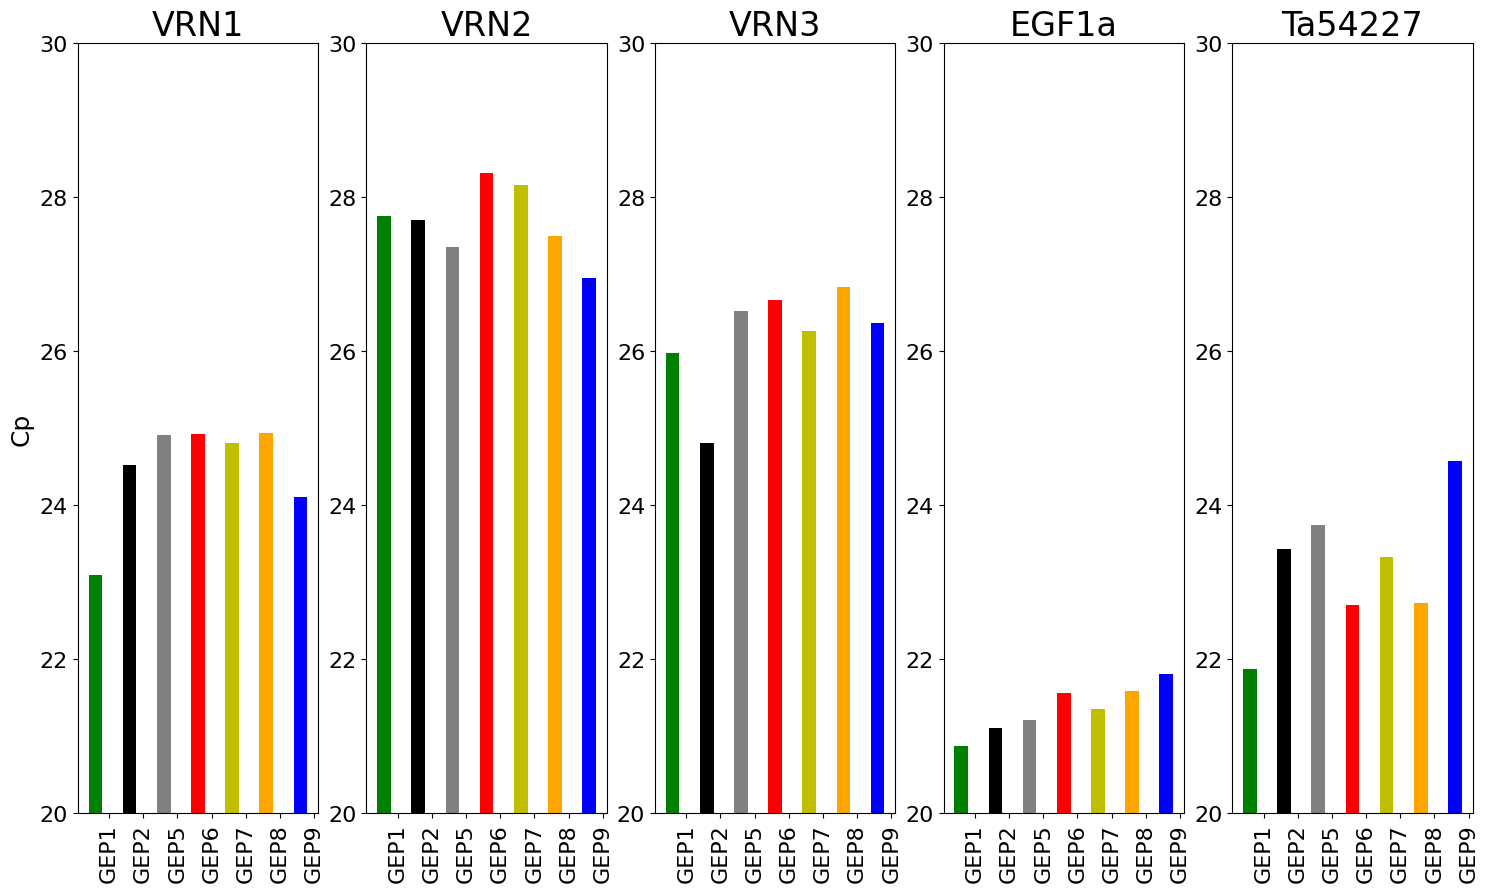

In [14]:
width = 0.4
ind = np.arange(7) + width
Fig = plt.figure(figsize=(18, 10))

pos = 1
for gene in Genes:
    ax = Fig.add_subplot(1,5,pos, xticklabels=['GEP1','GEP2', 'GEP5', 'GEP6', 'GEP7', 'GEP8','GEP9'])
    plt.bar(ind, RefCps.loc[gene,'Cp'],width,color=['g','k','grey','r','y','orange','b'])
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    plt.tick_params(labelsize=16)
    plt.title(gene,fontsize = 24)
    plt.xticks(ind+width)
    plt.ylim(20,30)
    if pos == 1:
        plt.ylabel('Cp',fontsize=18)
    pos +=1

## Make a dataframe with normalisation factors to account for plat to plate variability

In [15]:
#Calculate the mean Cp for each gene across all plates
RefMeans = RefCps.groupby(level='gene').mean()
#Then calculate the Cp for each gene in each plate relative to 
#the mean for that gne across all plates
for ref in RefCps.index:
    RefCps.loc[ref,'NormFactor'] = RefMeans.loc[ref[0],'Cp']/RefCps.loc[ref].values[0]

## Make a column in qPCRdt frame with normalised Cp values

In [16]:
for Obs in qPCRdt.index:
    Plate = qPCRdt.loc[Obs,'Plate']
    Gene = qPCRdt.loc[Obs,'gene']
    NormFactor = RefCps.loc[(Gene,Plate),'NormFactor']
    qPCRdt.loc[Obs,'CpNorm'] = qPCRdt.loc[Obs,'Cp'] * NormFactor

## Make an index table so we can relate experimental data to sample name

In [17]:
#Slice out the coluns that hold experimental descriptors and drop duplicate rows
TreatIndex = qPCRdt.loc[qPCRdt.gene=='Ta54227',
          [u'SampleIndex',u'Name', u'Plate', u'SampleDate', u'Experiment',
           u'Plot.ID.Old', u'Plot.IDNew',u'Vern', u'Cult', u'Pp']].drop_duplicates()
#Make name the index for this dataframe
TreatIndex.set_index('SampleIndex',inplace=True)

## Make dataframes with normalised expersion deltas

In [18]:
#Get means for each gene and then slice out the Cp data row
Intermediate = qPCRdt.groupby(['SampleIndex','gene']).mean('numeric_only').loc[:,'CpNorm']
#Make into a table with name as index and Cp for each gene in columns
qPCRdtMeans = Intermediate.unstack()
#Make dataframes that subtract house keeper experssion from the genes
Tdelta = np.power(2,-qPCRdtMeans.loc[:,['VRN1','VRN2','VRN3','EGF1a']].subtract(qPCRdtMeans.loc[:,'Ta54227'],axis=0))
Edelta = np.power(2,qPCRdtMeans.loc[:,['VRN1','VRN2','VRN3','Ta54227']].subtract(qPCRdtMeans.loc[:,'EGF1a'],axis=0))

## Join the index info onto the delta dataframes

In [19]:
Td_ind = Tdelta.join(TreatIndex)
Td_ind.SampleDate = pd.to_datetime(Td_ind.SampleDate)
#Td_ind = Td_ind.where(Td_ind.isnull()==False,other=0)
Ed_ind = Edelta.join(TreatIndex)
Ed_ind.SampleDate = pd.to_datetime(Ed_ind.SampleDate)
#Ed_ind = Ed_ind.where(Ed_ind.isnull()==False,other=0)

In [20]:
def StartDate(Name):
    if Td_ind.loc[Name,'Pp'] == 16.0:
        if Td_ind.loc[Name,'Vern'] == 'Nil':
            return PP16NonSD 
        else:
            return PP16VernSD 
    else:
        if Td_ind.loc[Name,'Vern'] == 'Nil':
            return PP8NonSD 
        else:
            return PP8VernSD     

Td_ind.loc[:,'StartDate'] = [StartDate(ex) for ex in Td_ind.index]
Td_ind.loc[:,'DAS'] = Td_ind.loc[:,'SampleDate'] - Td_ind.loc[:,'StartDate'] 
Td_ind.loc[:,'Tt'] = Td_ind.loc[:,'DAS']/np.timedelta64(1, 'D') * 21 #Mean growth room temperature 
Ed_ind.loc[:,'StartDate'] = [StartDate(ex) for ex in Ed_ind.index]
Ed_ind.loc[:,'DAS'] = Ed_ind.loc[:,'SampleDate'] - Ed_ind.loc[:,'StartDate'] 
Ed_ind.loc[:,'Tt'] = Ed_ind.loc[:,'DAS']/np.timedelta64(1, 'D') * 21 #Mean growth room temperature 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


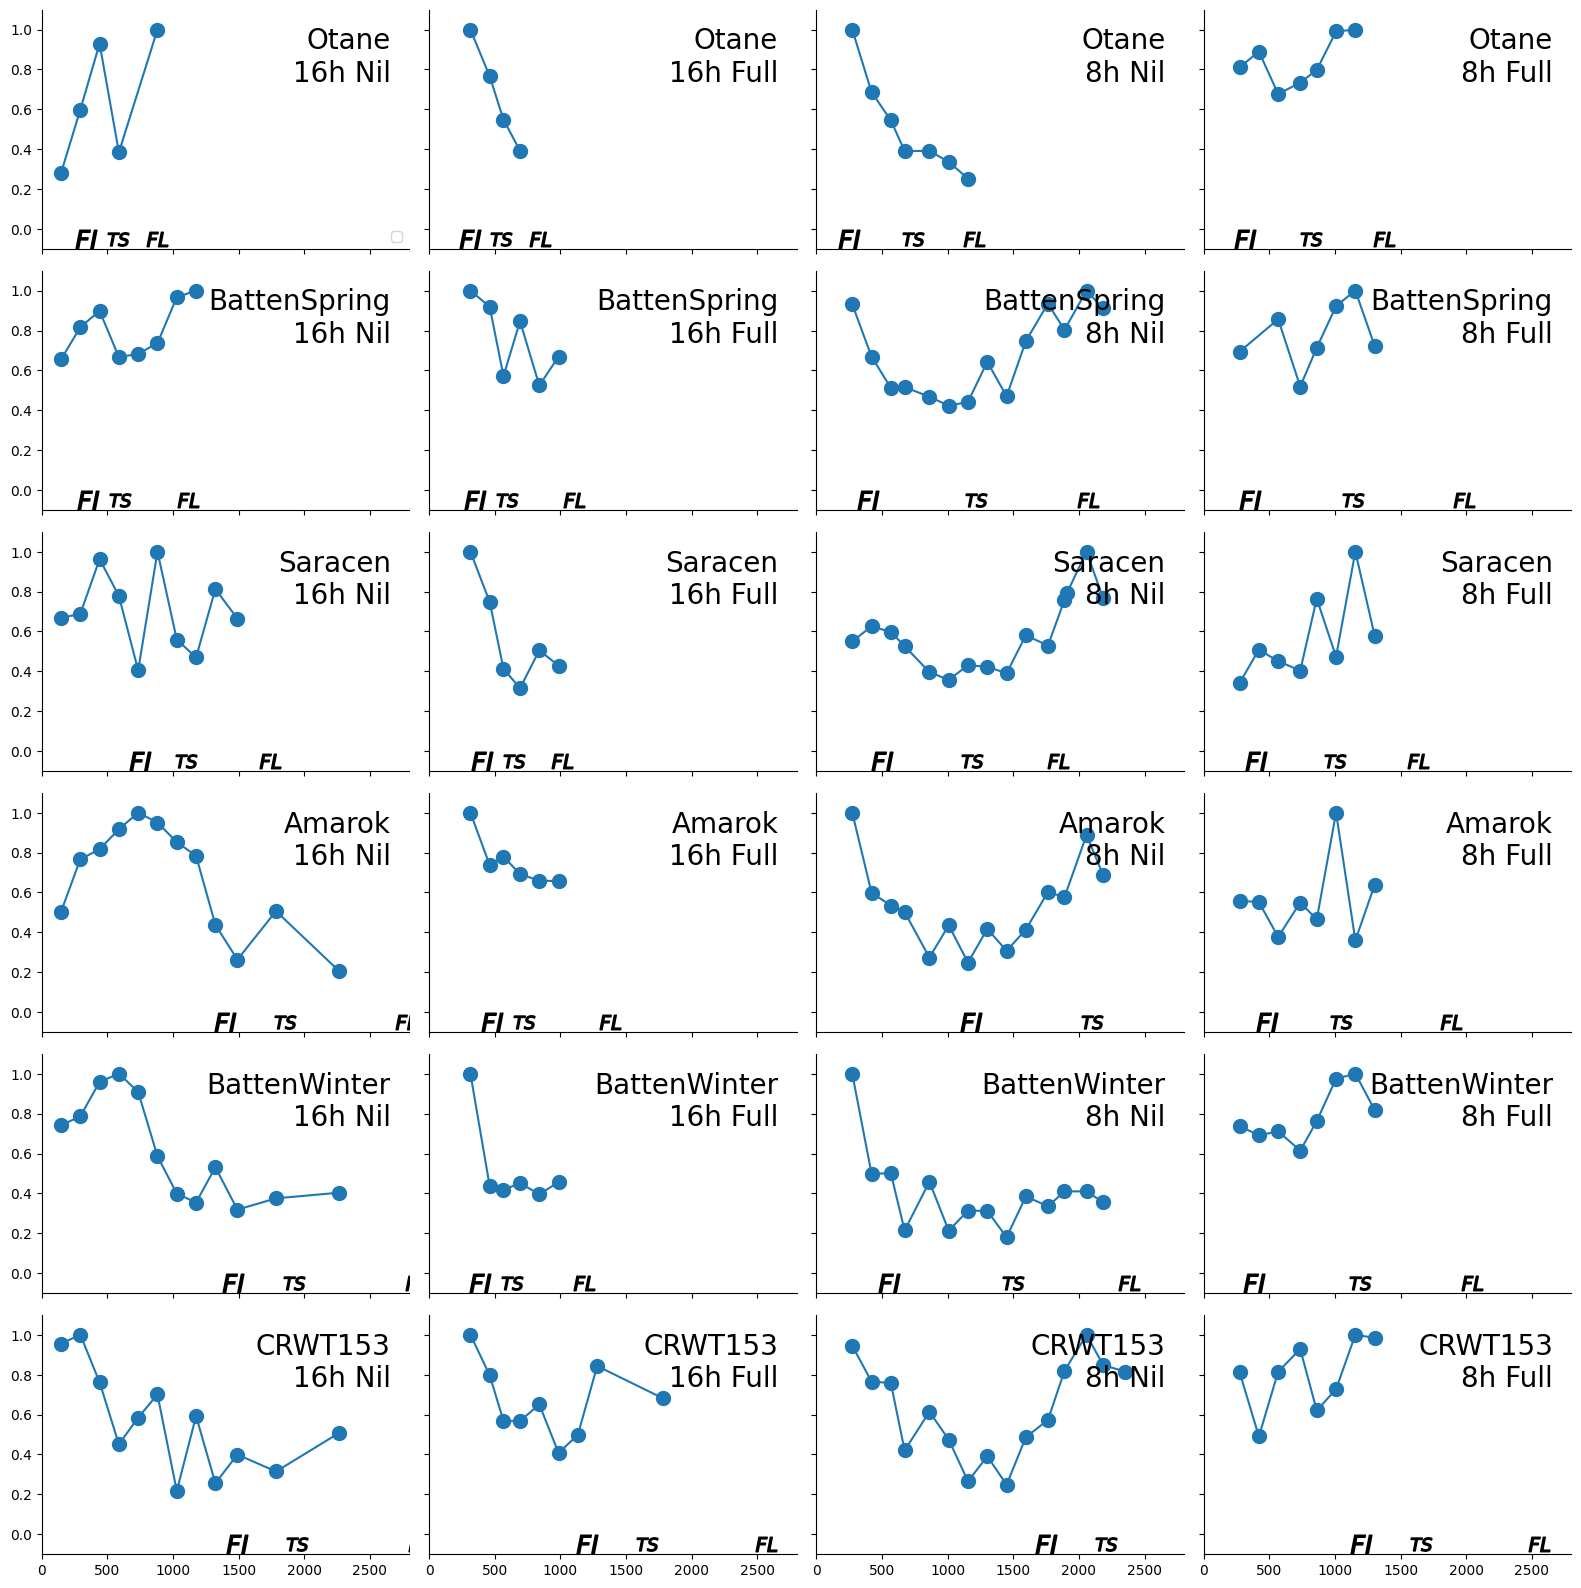

In [21]:
Fig2 = plt.figure(figsize=(16,16))
pos = 1
for Cult in Cults:
    TrtCnt = 1
    for Pp in Pps:
        for Vern in Verns:
            ax = Fig2.add_subplot(6,4,pos,)
            for Gene in ['EGF1a']:
                    Filter = (Td_ind.Cult == Cult)&(Td_ind.Vern == Vern)&(Td_ind.Pp == Pp)
                    Data = Td_ind[Filter].groupby('SampleDate').mean('numeric_only')
                    RelExpress = Data.loc[:,Gene]/Data.loc[:,Gene].max()
                    plt.plot(Data.loc[:,'Tt'],RelExpress,'o-',ms=10)
            plt.plot([PhenoStages.loc[(Pp,Vern,Cult),'FITT']],[-.05], marker=u'$FI$',ms=15,color='k')
            plt.plot([PhenoStages.loc[(Pp,Vern,Cult),'TSTT']],[-.05], marker=u'$TS$',ms=15,color='k')
            plt.plot([PhenoStages.loc[(Pp,Vern,Cult),'FLTT']],[-.05], marker=u'$FL$',ms=15,color='k')
            plt.ylim(-0.1,1.1)
            plt.xlim(0,2800)
            label = Cult + '\n' + str(Pp).replace('.0','h')+ ' ' +str(Vern)
            plt.text(0.95,0.7,label,fontsize=20,transform=ax.transAxes,horizontalalignment='right')
            if pos == 1:
                plt.legend(loc=4)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True)
            plt.tick_params(axis='y', which='both', left=True,right=False, labelbottom=True)
            if pos <= 20:
                ax.tick_params(labelbottom=False)
            ax.tick_params(labelleft=False)
            if pos in [1,5,9,13,17,21]:
                ax.tick_params(labelleft=True)
            pos += 1
            TrtCnt += 1
    
plt.tight_layout()

In [22]:
def CalcdHS(Tt,HS,BasePhyllochron):
    if HS <= 2.0:
        Phyllochron = float(BasePhyllochron) * 0.7
    else:
        if HS <= 7.0:
            Phyllochron = float(BasePhyllochron)
        else:
            Phyllochron = float(BasePhyllochron) * 1.3
    return Tt/Phyllochron

def CalcdVrn1(Tt, Vrn4, BasedVrn1, MUdVrn1, dHS):
    UdVrn1 = 0.0
    if Tt < 0.0:
        BasedVrn1 = 0.0
    else:
        if Vrn4==0:
            UdVrn1 = MUdVrn1 * np.exp(-0.15*Tt)
    return (BasedVrn1 + UdVrn1) * dHS

def CalcdVrn2(Pp, BasedVrn2, MUdVrn2, dHS):
    if Pp <= 8.0:
        UdVrn2 = 0.0
    if (Pp > 8.0) & (Pp < 16.0):
        UdVrn2 = MUdVrn2 * (Pp-8)/(16-8)
    if Pp >= 16:
        UdVrn2 = MUdVrn2
    return (BasedVrn2 + UdVrn2) * dHS

def CalcdVrn3(Pp, BasedVrn3, MUdVrn3, dHS):
    if Pp <= 8.0:
        UdVrn3 = 0.0
    if (Pp > 8.0) & (Pp < 16.0):
        UdVrn3 = MUdVrn3 * (Pp-8)/(16-8)
    if Pp >= 16:
        UdVrn3 = MUdVrn3
    return (BasedVrn3 + UdVrn3) * dHS

def CalcdVrn4(Tt, MDdVrn4, dHS):
    if Tt < 0.0:
        UdVrn4 = 0.0
    else:
        DdVrn4 = MDdVrn4 * np.exp(-0.19*Tt)
    return DdVrn4 * dHS

In [23]:
def GEPmodel(Out, Day, Tt, Pp, Params):
    DF = pd.DataFrame(index = [0], columns = ['Tt','Pp'])
    
    #Assumed constant from Brown etal 2013 
    MUdVrn1 = 1.6               # Assumed from Brown etal 2013
    BasedVrn2 = 0.0             # Assumed zero from Brown etal 2013
    ShortDayVrnSatTarget = 0.74 # Assumed from Brown etal 2013

    
    IsEmerged = False
    IsPreVernalised = False
    IsVernalised = False
    IsInduced = False
    IsReproductive = False
    IsAtFlagLeaf = False
    DF.loc[0,'Tt'] = Tt[0]
    DF.loc[0,'Pp'] = Pp[0]
    DF.loc[0,'HS'] = 0.0
    DF.loc[0,'Vrn1'] = 0.0
    DF.loc[0,'Vrn2'] = 0.0
    DF.loc[0,'Vrn3'] = 0.0
    DF.loc[0,'Vrn4'] = Params.InitVrn4
    DF.loc[0,'Vrn1Target'] = ShortDayVrnSatTarget
    DF.loc[0,'FIHS'] = 0
    DF.loc[0,'TSHS'] = 0
    DF.loc[0,'FLN'] = 2.86
    #Calculate dHS on first day
    dHS = CalcdHS(DF.loc[0,'Tt'],DF.loc[0,'HS'],Params.BasePhyllochron)
    #Update daily variable (HS)
    DF.loc[0,'HS'] = 0
    DF.loc[0,'AccumTt'] = DF.loc[0,'Tt']
    
    d = 0
    while (IsAtFlagLeaf == False) & (d <= Day[-1]):
        d +=1
        DF.loc[d,'Tt'] = Tt[d]
        DF.loc[d,'Pp'] = Pp[d]
    #Zero set deltas
        dHS = 0.0
        dVrn1 = 0.0
        dVrn2 = 0.0
        dVrn3 = 0.0
        dVrn4 = 0.0

    #First do Leaf appearance calculations   
        DF.loc[d,'AccumTt'] = DF.loc[d-1,'AccumTt'] + DF.loc[d,'Tt']
        dHS = CalcdHS(DF.loc[d,'Tt'],DF.loc[d-1,'HS'],Params.BasePhyllochron)
        if DF.loc[d,'AccumTt'] >= Params.BasePhyllochron:
            IsEmerged = True
            DF.loc[d,'HS'] = DF.loc[d-1,'HS'] +  dHS
        else:
            DF.loc[d,'HS'] = 0 
    #Next work out Vrn 4
        if IsPreVernalised == False:
            dVrn4 = CalcdVrn4(DF.loc[d,'Tt'], MUdVrn1 + Params.BasedVrn1, dHS)
        DF.loc[d,'Vrn4'] = max(DF.loc[d-1,'Vrn4'] - dVrn4,0.0)
        if DF.loc[d,'Vrn4'] == 0.0:
            IsPreVernalised = True
    #Then work out Vrn 1
        if (IsVernalised == False):
            dVrn1 = CalcdVrn1(DF.loc[d,'Tt'],DF.loc[d,'Vrn4'], Params.BasedVrn1, MUdVrn1,dHS)
        DF.loc[d,'Vrn1'] = min(DF.loc[d-1,'Vrn1'] + dVrn1,1.0)        
    #Then work out Vrn2 expression and its effect on vernalisation target
        if (IsVernalised == False) & (DF.loc[d,'HS'] >= 1.1):
            dVrn2 = CalcdVrn2(DF.loc[d,'Pp'], BasedVrn2, Params.MUdVrn2, dHS)
        DF.loc[d,'Vrn2'] = DF.loc[d-1,'Vrn2'] + dVrn2
        DF.loc[d,'Vrn1Target'] = min(ShortDayVrnSatTarget + DF.loc[d,'Vrn2'],1.0) 
        if DF.loc[d,'Vrn1'] >=  DF.loc[d,'Vrn1Target']:
            IsVernalised = True
    #express Vrn3 if vernalisation is complete
        if (IsVernalised == True) & (DF.loc[d,'HS'] >= 2.0) & (IsReproductive == False):
            dVrn3 = CalcdVrn3(DF.loc[d,'Pp'], Params.BasedVrn3, Params.MUdVrn3, dHS)
        DF.loc[d,'Vrn3'] = DF.loc[d-1,'Vrn3'] + dVrn3
        if (DF.loc[d,'Vrn3'] >= 0.3) & (IsInduced == False):
            IsInduced = True;
        if (DF.loc[d,'Vrn3'] >= 1.0) & (IsReproductive == False):
            IsReproductive = True;

        if IsInduced == False:
            DF.loc[d,'FIHS'] = DF.loc[d,'HS']
        else: 
            DF.loc[d,'FIHS'] = DF.loc[d-1,'FIHS']
        if IsReproductive == False:
            DF.loc[d,'TSHS'] = DF.loc[d,'HS']
            DF.loc[d,'FLN'] = 2.86 + 1.1 * DF.loc[d,'TSHS']
        else:
            DF.loc[d,'TSHS'] = DF.loc[d-1,'TSHS']
            DF.loc[d,'FLN'] = DF.loc[d-1,'FLN']
    #Finally work out if Flag leaf has appeared.
        if DF.loc[d,'HS'] >= DF.loc[d,'FLN']:
            IsAtFlagLeaf = True        
        if DF.loc[d,'HS'] > 25:
            IsAtFlagLeaf = True
            
            DF.loc[d,'FLN'] = 25
    if Out == 'FLN':
        return DF.iloc[-1,:]['FLN']
    else:
        return DF

In [24]:
Params = pd.DataFrame(index=['CRWT153', 'Saracen', 'Amarok', 'Otane', 'BattenWinter', 'BattenSpring'],
            columns = 
            ['BasePhyllochron','BasedVrn3','MUdVrn3','InitVrn4','BasedVrn1','MUdVrn2'],
            data =    [
            [120,               0.12,       0.0,      1.0,        0.13,         0.026], #CRWT153
            [120,               0.21,       0.12,     1.0,        0.2,        1.0], #Saracen
            [120,               0.18,       0.04,     1.0,        0.09,       0.035], #Amarok
            [120,               0.25,       0.20,     0.0,        0.99,        0.0], #Otane
            [120,               0.15,       0.18,     1.0,        0.08,        0.06], #Batten Win
            [120,               0.15,       0.18,     0.0,        0.18,        0.0]]) #Batten Spr
            

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


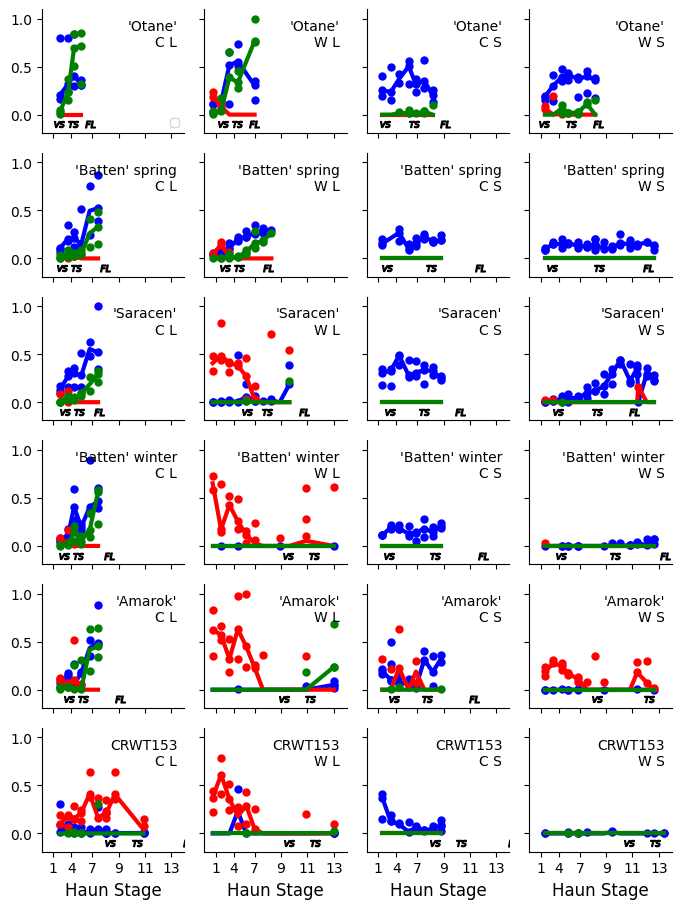

In [36]:
Cultivars = ['Otane', 'BattenSpring', 'Saracen', 'BattenWinter', 'Amarok', 'CRWT153']
CultNames = pd.DataFrame(index = Cultivars,columns=['Name'],data=["'Otane'","'Batten' spring","'Saracen'","'Batten' winter","'Amarok'",'CRWT153'])
VernDurats = pd.DataFrame(index=Verns.values,data=[0,100],columns=['Durat'])
GeneNames = pd.DataFrame(index = ['VRN1','VRN2','VRN3'],data=['Vrn1','Vrn2','Vrn3'],columns=['lower'])
PpSymbols = pd.DataFrame(index = [16,8],columns=['Name'],data=['L','S'])
cols = ['b','r','g']
VrnLabs = pd.DataFrame(index=['Full','Nil'],columns=['Lab'],data=['C','W'])
Fig2 = plt.figure(figsize=(6.92,9.2))
pos = 1
for Cult in ['Otane', 'BattenSpring', 'Saracen', 'BattenWinter', 'Amarok', 'CRWT153']:
    TrtCnt = 1
    for Pp in Pps:
        for Vern in ['Full','Nil']:
            Dur = 300
            Tt1 = [1] * VernDurats.loc[Vern,'Durat']
            Tt2 = [23] * (Dur - VernDurats.loc[Vern,'Durat'])
            Tt = Tt1 + Tt2
            Pp1 = [0] * VernDurats.loc[Vern,'Durat']
            Pp2 = [Pp] * (Dur - VernDurats.loc[Vern,'Durat'])
            pp = Pp1 + Pp2
            #GEPmodValues = GEPmodValues = BrownPred.loc[Cult,Vern,Pp]
            ax = Fig2.add_subplot(6,4,pos,)
            colpos = 0
            for Gene in ['VRN1','VRN2','VRN3']:
                    Filter = (Td_ind.Cult == Cult)&(Td_ind.Vern == Vern)&(Td_ind.Pp == Pp)
                    Data = Td_ind[Filter]
                    Medians = Data.where(Data.isnull()==False,other=0).groupby('SampleDate').median('numeric_only')
                    RelExpress = Data.loc[:,Gene]/Td_ind.loc[:,Gene].max()
                    RelMedians = Medians.loc[:,Gene]/Td_ind.loc[:,Gene].max()
                    plt.plot(Data.loc[:,'Tt'],RelExpress,'o',ms=5,color=cols[colpos])
                    plt.plot(Medians.loc[:,'Tt'],RelMedians,'-',lw=3,color=cols[colpos],label = '_nolegend_')
                    lower = GeneNames.loc[Gene,'lower']
                    #plt.plot(GEPmodValues.Tt.cumsum(),GEPmodValues.loc[:,lower],lw=5,color=cols[colpos],label = '_nolegend_')
                    colpos+=1
            plt.plot([PhenoStages.loc[(Pp,Vern,Cult),'FITT']],[-.1], marker=u'$VS$',ms=7,color='k')
            plt.plot([PhenoStages.loc[(Pp,Vern,Cult),'TSTT']],[-.1], marker=u'$TS$',ms=7,color='k')
            plt.plot([PhenoStages.loc[(Pp,Vern,Cult),'FLTT']],[-.1], marker=u'$FL$',ms=7,color='k')
            plt.ylim(-0.19,1.1)
            plt.xlim(0,2500)
            HSTicks = [1,4,7,9,11,13,15,17]
            TickPoss = [np.interp(x,BaseHSTT,BaseTT)for x in HSTicks]
            ax.xaxis.set_major_locator(plt.FixedLocator(TickPoss))
            ax.set_xticklabels(HSTicks)
            CultName = CultNames.loc[Cult,'Name']
            label = CultName + '\n' +VrnLabs.loc[Vern,'Lab'] + ' '  + PpSymbols.loc[Pp,'Name']
            plt.text(0.95,0.7,label,fontsize=10,transform=ax.transAxes,horizontalalignment='right')
            if pos == 1:
                plt.legend(loc=4, fontsize=8)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True,labelsize=10)
            plt.tick_params(axis='y', which='both', left=True,right=False, labelbottom=True,labelsize=10)
            if pos <= 20:
                ax.tick_params(labelbottom=False)
            else:
                plt.xlabel('Haun Stage',fontsize=12)
            ax.tick_params(labelleft=False)
            if pos in [1,5,9,13,17,21]:
                ax.tick_params(labelleft=True)
#             if pos == 9:
#                 plt.text(-.45,.4,'Relative expression',transform=ax.transAxes,rotation=90,fontsize=12)
            pos += 1
            TrtCnt += 1    
Fig2.patch.set_facecolor('white')
plt.tight_layout()
Fig2.savefig('C:\\Users\\cflhxb\\Dropbox\\WheatFlowering\\Fig7.jpg',format='jpg',dpi=300,bbox_inches="tight")     

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


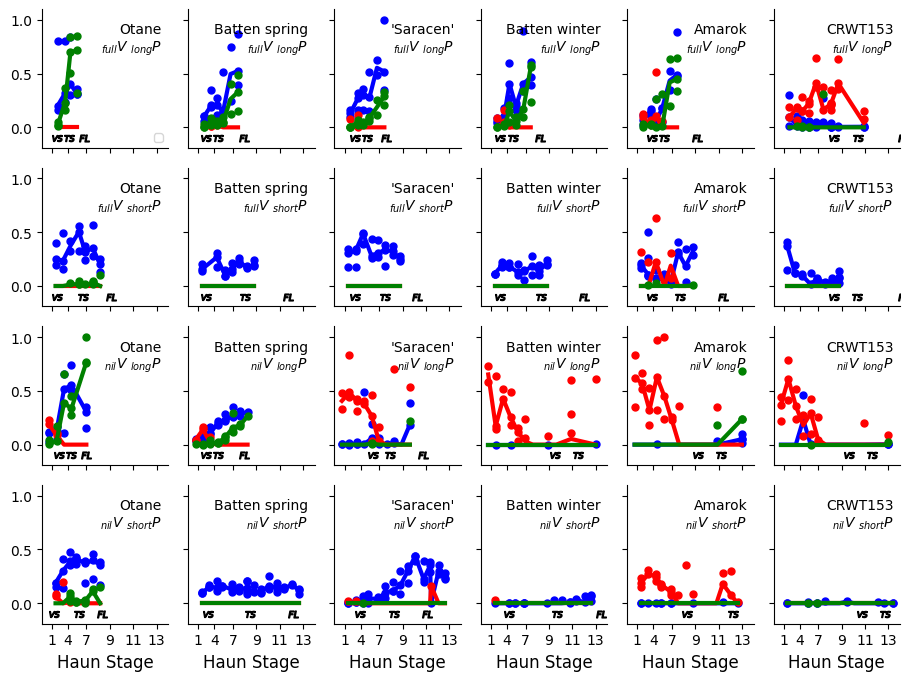

In [26]:
Cultivars = ['Otane', 'BattenSpring', 'Saracen', 'BattenWinter', 'Amarok', 'CRWT153']
CultNames = pd.DataFrame(index = Cultivars,columns=['Name'],data=['Otane',"Batten spring","'Saracen'","Batten winter","Amarok",'CRWT153'])
VernDurats = pd.DataFrame(index=Verns.values,data=[0,100],columns=['Durat'])
GeneNames = pd.DataFrame(index = ['VRN1','VRN2','VRN3'],data=['Vrn1','Vrn2','Vrn3'],columns=['lower'])
PpSymbols = pd.DataFrame(index = [16,8],columns=['Name'],data=['$_{long}P$','$_{short}P$'])
cols = ['b','r','g']
VrnLabs = pd.DataFrame(index=['Full','Nil'],columns=['Lab'],data=['$_{full}V$','$_{nil}V$'])
Fig2 = plt.figure(figsize=(9.2,6.92))
pos = 1
for Vern in ['Full','Nil']:
    for Pp in Pps:
        for Cult in ['Otane', 'BattenSpring', 'Saracen', 'BattenWinter', 'Amarok', 'CRWT153']:
            Dur = 300
            Tt1 = [1] * VernDurats.loc[Vern,'Durat']
            Tt2 = [23] * (Dur - VernDurats.loc[Vern,'Durat'])
            Tt = Tt1 + Tt2
            Pp1 = [0] * VernDurats.loc[Vern,'Durat']
            Pp2 = [Pp] * (Dur - VernDurats.loc[Vern,'Durat'])
            pp = Pp1 + Pp2
            GEPmodValues = GEPmodel('All', range(Dur), Tt, pp, Params.loc[Cult,:])
            ax = Fig2.add_subplot(4,6,pos,)
            colpos = 0
            for Gene in ['VRN1','VRN2','VRN3']:
                    Filter = (Td_ind.Cult == Cult)&(Td_ind.Vern == Vern)&(Td_ind.Pp == Pp)
                    Data = Td_ind[Filter]
                    Medians = Data.where(Data.isnull()==False,other=0).groupby('SampleDate').median('numeric_only')
                    RelExpress = Data.loc[:,Gene]/Td_ind.loc[:,Gene].max()
                    RelMedians = Medians.loc[:,Gene]/Td_ind.loc[:,Gene].max()
                    plt.plot(Data.loc[:,'Tt'],RelExpress,'o',ms=5,color=cols[colpos])
                    plt.plot(Medians.loc[:,'Tt'],RelMedians,'-',lw=3,color=cols[colpos],label = '_nolegend_')
                    lower = GeneNames.loc[Gene,'lower']
                    #plt.plot(GEPmodValues.Tt.cumsum(),GEPmodValues.loc[:,lower],lw=5,color=cols[colpos],label = '_nolegend_')
                    colpos+=1
            plt.plot([PhenoStages.loc[(Pp,Vern,Cult),'FITT']],[-.1], marker=u'$VS$',ms=7,color='k')
            plt.plot([PhenoStages.loc[(Pp,Vern,Cult),'TSTT']],[-.1], marker=u'$TS$',ms=7,color='k')
            plt.plot([PhenoStages.loc[(Pp,Vern,Cult),'FLTT']],[-.1], marker=u'$FL$',ms=7,color='k')
            plt.ylim(-0.19,1.1)
            plt.xlim(0,2500)
            HSTicks = [1,4,7,9,11,13,15,17]
            TickPoss = [np.interp(x,BaseHSTT,BaseTT)for x in HSTicks]
            ax.xaxis.set_major_locator(plt.FixedLocator(TickPoss))
            ax.set_xticklabels(HSTicks)
            CultName = CultNames.loc[Cult,'Name']
            label = CultName + '\n' +VrnLabs.loc[Vern,'Lab'] + ' '  + PpSymbols.loc[Pp,'Name']
            plt.text(0.95,0.7,label,fontsize=10,transform=ax.transAxes,horizontalalignment='right')
            if pos == 1:
                plt.legend(loc=4, fontsize=8)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True,labelsize=10)
            plt.tick_params(axis='y', which='both', left=True,right=False, labelbottom=True,labelsize=10)
            if pos <= 18:
                ax.tick_params(labelbottom=False)
            else:
                plt.xlabel('Haun Stage',fontsize=12)
            ax.tick_params(labelleft=False)
            if pos in [1,7,13,19]:
                ax.tick_params(labelleft=True)
#             if pos == 7:
#                 plt.text(-.45,.4,'Relative expression',transform=ax.transAxes,rotation=90,fontsize=12)
            pos += 1
        TrtCnt += 1    
plt.tight_layout()
#Fig2.savefig('C:\\Users\\cflhxb\\Dropbox\\WheatFlowering\\Fig7.jpg',format='jpg',dpi=300,bbox_inches="tight")     

In [27]:
Td_ind.to_pickle('VrnExpression.pkl')

In [28]:
Td_ind

,VRN1,VRN2,VRN3,EGF1a,Name,Plate,SampleDate,Experiment,Plot.ID.Old,Plot.IDNew,Vern,Cult,Pp,StartDate,DAS,Tt
SampleIndex,,,,,,,,,,,,,,,,
AMK105 2014-02-04,NaN,0.034441,NaN,2.940171,AMK105,GEP1,2014-02-04,3.0,105.0,300105.0,Nil,Amarok,16.0,2014-01-28,7 days,147.0
AMK109 2014-06-10,0.995020,NaN,0.377515,1.128422,AMK109,GEP5,2014-06-10,3.0,109.0,300109.0,Full,Amarok,16.0,2014-05-01,40 days,840.0
AMK110 2014-06-10,0.664831,NaN,0.118303,1.466509,AMK110,GEP5,2014-06-10,3.0,110.0,300110.0,Full,Amarok,16.0,2014-05-01,40 days,840.0
AMK1134 2014-11-11,0.690119,NaN,0.004561,2.848728,AMK1134,GEP9,2014-11-11,4.0,1134.0,401134.0,Full,Amarok,8.0,2014-09-10,62 days,1302.0
AMK1135 2014-11-11,0.549079,NaN,NaN,1.500173,AMK1135,GEP9,2014-11-11,4.0,1135.0,401135.0,Full,Amarok,8.0,2014-09-10,62 days,1302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SCN85 2014-05-23,0.513657,NaN,0.030590,1.301014,SCN85,GEP5,2014-05-23,3.0,85.0,300085.0,Full,Saracen,16.0,2014-05-01,22 days,462.0
SCN95 2014-03-11,0.024010,NaN,NaN,3.955968,SCN95,GEP1,2014-03-11,3.0,95.0,300095.0,Nil,Saracen,16.0,2014-01-28,42 days,882.0
SCN98 2014-10-20,0.557556,NaN,NaN,3.148730,SCN98,GEP8,2014-10-20,4.0,98.0,400098.0,Nil,Saracen,8.0,2014-07-22,90 days,1890.0


In [29]:
ForcedPhenoStages = PhenoStages.copy().loc[PhenoStages.index.isin(['BattenWinter','BattenSpring'],level=2),['TSTT','FITT']]

In [30]:
ForcedPhenoStages

TSTT         FITT
PhotoP Vern Cult                                  
8      Full BattenSpring  1133.745455   350.527273
            BattenWinter  1191.459740   386.572727
       Nil  BattenSpring  1215.810057   393.895571
            BattenWinter  1501.018182   550.163636
16     Full BattenSpring   594.235407   350.235407
            BattenWinter   630.880808   386.880808
       Nil  BattenSpring   600.072727   356.072727
            BattenWinter  1920.758442  1459.044156

In [31]:
ForcedPhenoStages.loc[(8,'Full','BattenSpring'), 'FITT'] = 200
ForcedPhenoStages.loc[(8,'Full','BattenSpring'), 'TSTT'] = 1100
ForcedPhenoStages.loc[(8,'Full','BattenWinter'), 'FITT'] = 200
ForcedPhenoStages.loc[(8,'Full','BattenWinter'), 'TSTT'] = 1100

ForcedPhenoStages.loc[(8,'Nil','BattenSpring'), 'FITT'] = 300
ForcedPhenoStages.loc[(8,'Nil','BattenSpring'), 'TSTT'] = 1100
ForcedPhenoStages.loc[(8,'Nil','BattenWinter'), 'FITT'] = 1000
ForcedPhenoStages.loc[(8,'Nil','BattenWinter'), 'TSTT'] = 2000

ForcedPhenoStages.loc[(16,'Full','BattenSpring'), 'FITT'] = 200
ForcedPhenoStages.loc[(16,'Full','BattenSpring'), 'TSTT'] = 600
ForcedPhenoStages.loc[(16,'Full','BattenWinter'), 'FITT'] = 200
ForcedPhenoStages.loc[(16,'Full','BattenWinter'), 'TSTT'] = 600

ForcedPhenoStages.loc[(16,'Nil','BattenSpring'), 'FITT'] = 300
ForcedPhenoStages.loc[(16,'Nil','BattenSpring'), 'TSTT'] = 600
ForcedPhenoStages.loc[(16,'Nil','BattenWinter'), 'FITT'] = 1500
ForcedPhenoStages.loc[(16,'Nil','BattenWinter'), 'TSTT'] = 2000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


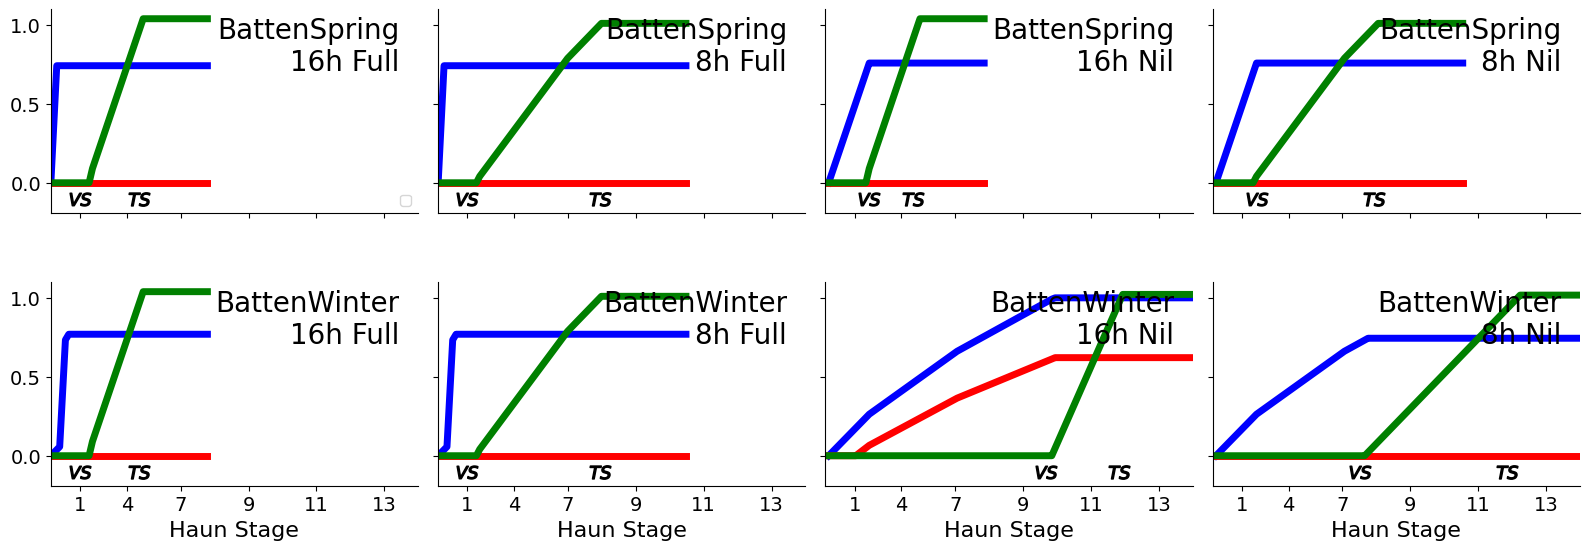

In [32]:
VernDurats = pd.DataFrame(index=Verns.values,data=[0,100],columns=['Durat'])
GeneNames = pd.DataFrame(index = ['VRN1','VRN2','VRN3'],data=['Vrn1','Vrn2','Vrn3'],columns=['lower'])
cols = ['b','r','g']
Fig2 = plt.figure(figsize=(16,16))
pos = 1
for Cult in ['BattenSpring','BattenWinter']:
    TrtCnt = 1
    for Vern in ['Full','Nil']:
        for Pp in Pps:
            Dur = 300
            Tt1 = [1] * VernDurats.loc[Vern,'Durat']
            Tt2 = [23] * (Dur - VernDurats.loc[Vern,'Durat'])
            Tt = Tt1 + Tt2
            Pp1 = [0] * VernDurats.loc[Vern,'Durat']
            Pp2 = [Pp] * (Dur - VernDurats.loc[Vern,'Durat'])
            pp = Pp1 + Pp2
            GEPmodValues = GEPmodel('All', range(Dur), Tt, pp, Params.loc[Cult,:])
            ax = Fig2.add_subplot(6,4,pos,)
            colpos = 0
            for Gene in ['VRN1','VRN2','VRN3']:
                    lower = GeneNames.loc[Gene,'lower']
                    plt.plot(GEPmodValues.Tt.cumsum(),GEPmodValues.loc[:,lower],lw=5,color=cols[colpos],label = '_nolegend_')
                    colpos+=1
            plt.plot([ForcedPhenoStages.loc[(Pp,Vern,Cult),'FITT']],[-.1], marker=u'$VS$',ms=15,color='k')
            plt.plot([ForcedPhenoStages.loc[(Pp,Vern,Cult),'TSTT']],[-.1], marker=u'$TS$',ms=15,color='k')
            plt.ylim(-0.19,1.1)
            plt.xlim(0,2500)
            HSTicks = [1,4,7,9,11,13,15,17]
            TickPoss = [np.interp(x,BaseHSTT,BaseTT)for x in HSTicks]
            ax.xaxis.set_major_locator(plt.FixedLocator(TickPoss))
            ax.set_xticklabels(HSTicks)
            label = Cult + '\n' + str(Pp).replace('.0','h')+ ' ' +str(Vern)
            plt.text(0.95,0.7,label,fontsize=20,transform=ax.transAxes,horizontalalignment='right')
            if pos == 1:
                plt.legend(loc=4)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True,labelsize=14)
            plt.tick_params(axis='y', which='both', left=True,right=False, labelbottom=True,labelsize=14)
            if pos <= 4:
                ax.tick_params(labelbottom=False)
            else:
                plt.xlabel('Haun Stage',fontsize=16)
            ax.tick_params(labelleft=False)
            if pos in [1,5,9,13,17,21]:
                ax.tick_params(labelleft=True)
            if pos == 9:
                plt.ylabel('Relative expression',fontsize=16)
            pos += 1
            TrtCnt += 1
    
plt.tight_layout()

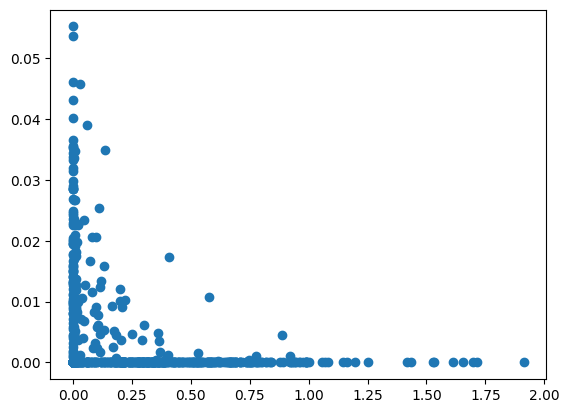

In [33]:
plt.plot(Td_ind.fillna(0).VRN1,Td_ind.fillna(0).VRN2,'o')

In [34]:
Td_ind

,VRN1,VRN2,VRN3,EGF1a,Name,Plate,SampleDate,Experiment,Plot.ID.Old,Plot.IDNew,Vern,Cult,Pp,StartDate,DAS,Tt
SampleIndex,,,,,,,,,,,,,,,,
AMK105 2014-02-04,NaN,0.034441,NaN,2.940171,AMK105,GEP1,2014-02-04,3.0,105.0,300105.0,Nil,Amarok,16.0,2014-01-28,7 days,147.0
AMK109 2014-06-10,0.995020,NaN,0.377515,1.128422,AMK109,GEP5,2014-06-10,3.0,109.0,300109.0,Full,Amarok,16.0,2014-05-01,40 days,840.0
AMK110 2014-06-10,0.664831,NaN,0.118303,1.466509,AMK110,GEP5,2014-06-10,3.0,110.0,300110.0,Full,Amarok,16.0,2014-05-01,40 days,840.0
AMK1134 2014-11-11,0.690119,NaN,0.004561,2.848728,AMK1134,GEP9,2014-11-11,4.0,1134.0,401134.0,Full,Amarok,8.0,2014-09-10,62 days,1302.0
AMK1135 2014-11-11,0.549079,NaN,NaN,1.500173,AMK1135,GEP9,2014-11-11,4.0,1135.0,401135.0,Full,Amarok,8.0,2014-09-10,62 days,1302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SCN85 2014-05-23,0.513657,NaN,0.030590,1.301014,SCN85,GEP5,2014-05-23,3.0,85.0,300085.0,Full,Saracen,16.0,2014-05-01,22 days,462.0
SCN95 2014-03-11,0.024010,NaN,NaN,3.955968,SCN95,GEP1,2014-03-11,3.0,95.0,300095.0,Nil,Saracen,16.0,2014-01-28,42 days,882.0
SCN98 2014-10-20,0.557556,NaN,NaN,3.148730,SCN98,GEP8,2014-10-20,4.0,98.0,400098.0,Nil,Saracen,8.0,2014-07-22,90 days,1890.0
